<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/visualizing_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Naive Bayes

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from matplotlib.patches import Ellipse

In [3]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor=facecolor,
                      **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

 ## Calculate the likelihoods for each tweet

For each tweet, we have calculated the likelihood of the tweet to be positive and the likelihood to be negative. We have calculated in different columns the numerator and denominator of the likelihood ratio introduced previously.  

$$log \frac{P(tweet|pos)}{P(tweet|neg)} = log(P(tweet|pos)) - log(P(tweet|neg)) $$
$$positive = log(P(tweet|pos)) = \sum_{i=0}^{n}{log P(W_i|pos)}$$
$$negative = log(P(tweet|neg)) = \sum_{i=0}^{n}{log P(W_i|neg)}$$

We did not include the code because this is part of this week's assignment.  The __'bayes_features.csv'__ file contains the final result of this process. 

The cell below loads the table in a dataframe. Dataframes are data structures that simplify the manipulation of data, allowing filtering, slicing, joining, and summarization.

In [4]:
log_likelihoods_url = 'https://raw.githubusercontent.com/martin-fabbri/colab-notebooks/master/data/nlp/bayes_features.csv'
data = pd.read_csv(log_likelihoods_url)
data.head(3)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0


Text(0.5, 0, 'Negative')

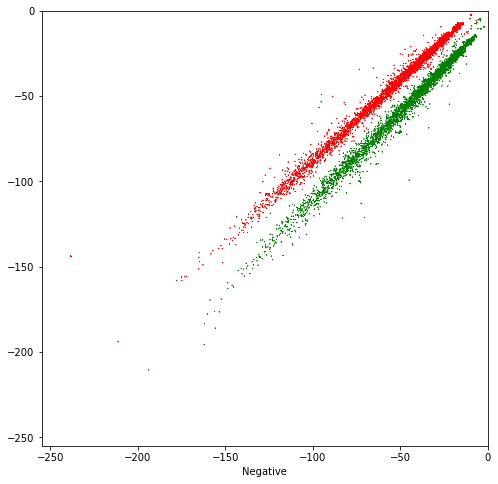

In [5]:
# plot the sample using columns 1 and 2 of the matrix

fig, ax = plt.subplots(figsize = (8, 8))
colors = ['red', 'green']
ax.scatter(data.positive, data.negative, 
           c=[colors[int(k)] for k in data.sentiment], s=0.1, marker='*')
plt.xlim(-255, 0)
plt.ylim(-255, 0)

plt.xlabel('Positive')
plt.xlabel('Negative')

# Using Confidence Ellipses to interpret Naïve Bayes

In this section, we will use the [confidence ellipse]( https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py) to give us an idea of what the Naïve Bayes model see.

A confidence ellipse is a way to visualize a 2D random variable. It is a better way than plotting the points over a cartesian plane because, with big datasets, the points can overlap badly and hide the real distribution of the data. Confidence ellipses summarize the information of the dataset with only four parameters: 

* Center: It is the numerical mean of the attributes
* Height and width: Related with the variance of each attribute. The user must specify the desired amount of standard deviations used to plot the ellipse. 
* Angle: Related with the covariance among attributes.

The parameter __n_std__ stands for the number of standard deviations bounded by the ellipse. Remember that for normal random distributions:

* About 68% of the area under the curve falls within 1 standard deviation around the mean.
* About 95% of the area under the curve falls within 2 standard deviations around the mean.
* About 99.7% of the area under the curve falls within 3 standard deviations around the mean.


In the next chart, we will plot the data and its corresponding confidence ellipses using 2 std and 3 std. 

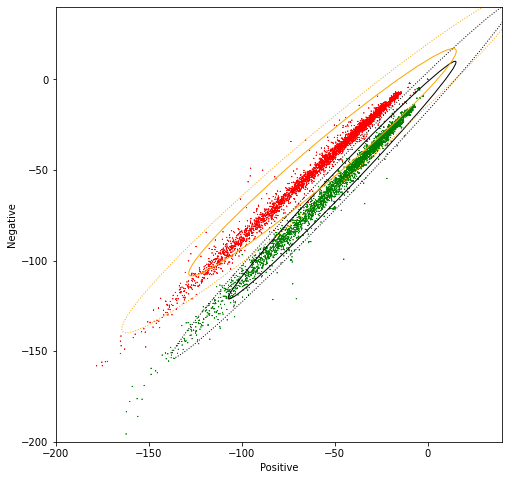

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red', 'green']

ax.scatter(data.positive, data.negative, 
           c=[colors[int(k)] for k in data.sentiment], s=0.1, marker='*')
plt.xlim(-200, 40)
plt.ylim(-200, 40)

plt.xlabel('Positive')
plt.ylabel('Negative')

data_pos = data[data.sentiment == 1]
data_neg = data[data.sentiment == 0]

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=2, 
                   edgecolor='black', label=r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=2, 
                   edgecolor='orange')

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std=3, 
                   edgecolor='black', linestyle=':', label=r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, 
                   edgecolor='orange', linestyle=':', );
